## Exploratory Data Analysis for Data Visualization


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries

We will import the following libraries the lab


In [6]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [7]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

#df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


### TASK 0: Visualize the relationship between Flight Number and Payload

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


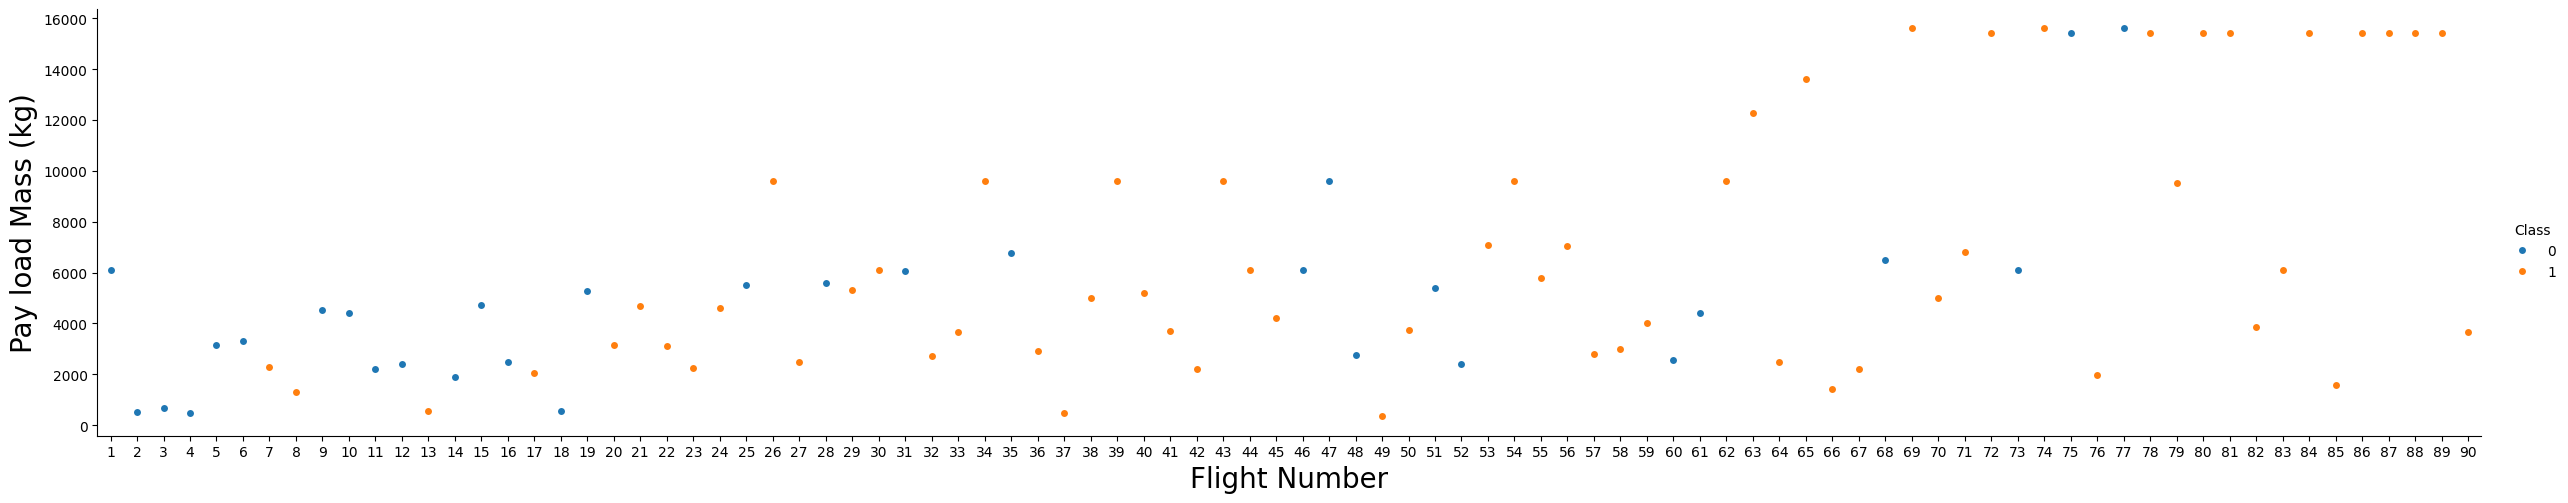

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


In [9]:
df.groupby(['LaunchSite'])['Class'].value_counts(normalize=True)

LaunchSite    Class
CCAFS SLC 40  1        0.600000
              0        0.400000
KSC LC 39A    1        0.772727
              0        0.227273
VAFB SLC 4E   1        0.769231
              0        0.230769
Name: proportion, dtype: float64

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


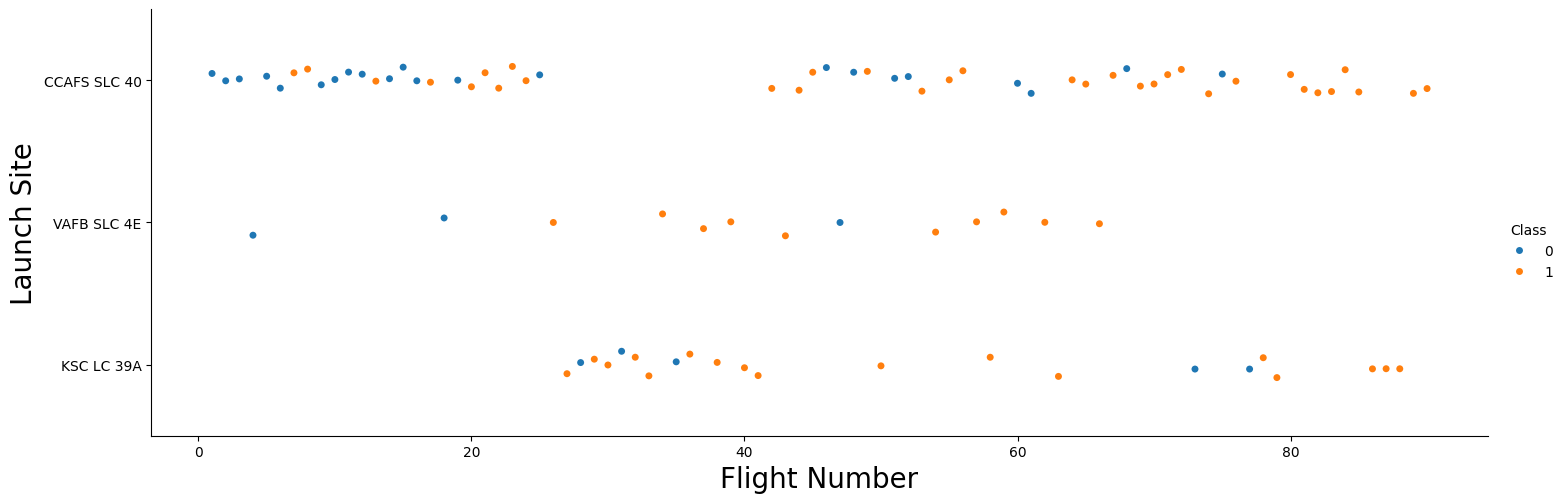

In [10]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=3)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

**Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots:**<br>
- There's generally more sucess as the flight number increases 

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


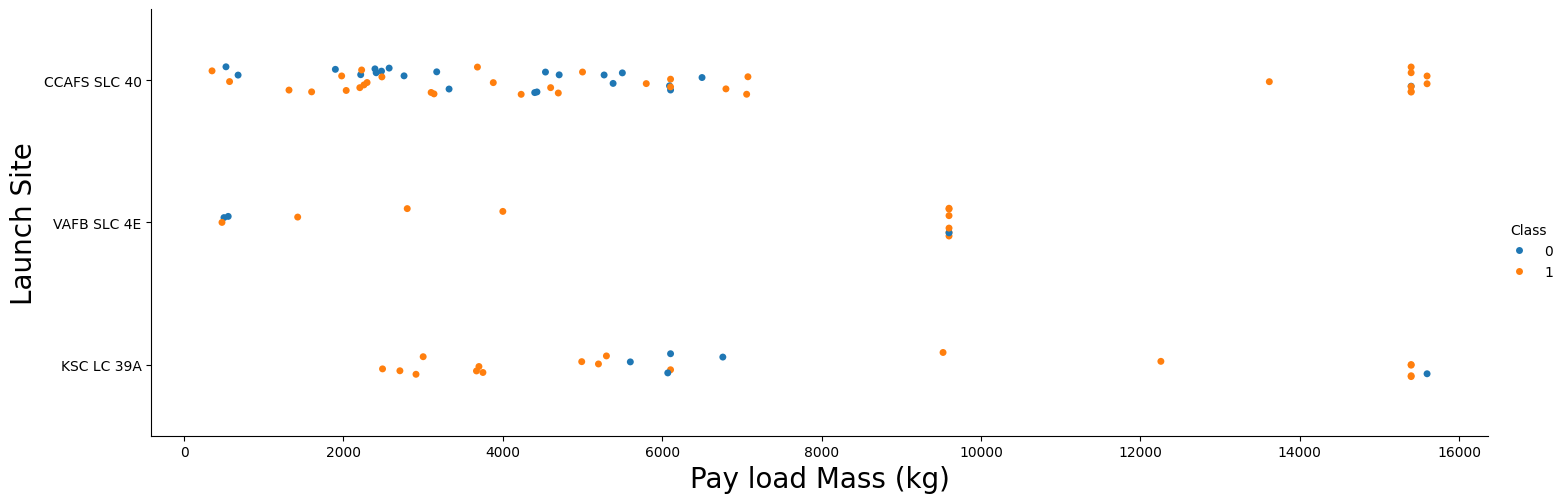

In [11]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=3)
plt.ylabel("Launch Site", fontsize=20)
plt.xlabel("Pay load Mass (kg)", fontsize=20)
plt.show()

**Now try to explain any patterns you found in the Payload Vs. Launch Site scatter point chart:**<br>
- High success rate when pay load mass is greater than 8000kg

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


In [12]:
orbit_success = df.groupby(['Orbit'])['Class'].mean()
orbit_success

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

Let's create a `bar chart` for the sucess rate of each orbit


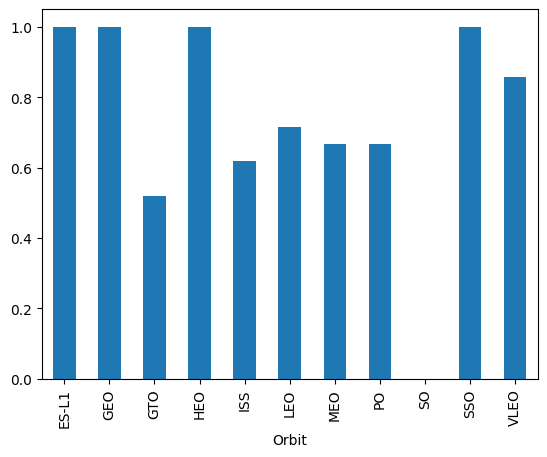

In [13]:
# HINT use groupby method on Orbit column and get the mean of Class column
df.groupby(['Orbit'])['Class'].mean().plot(kind='bar')
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.

In [14]:
for orbit in orbit_success.keys():
    if orbit_success[orbit] >= 0.6: #high success rate as 60%
        print(orbit)

ES-L1
GEO
HEO
ISS
LEO
MEO
PO
SSO
VLEO


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


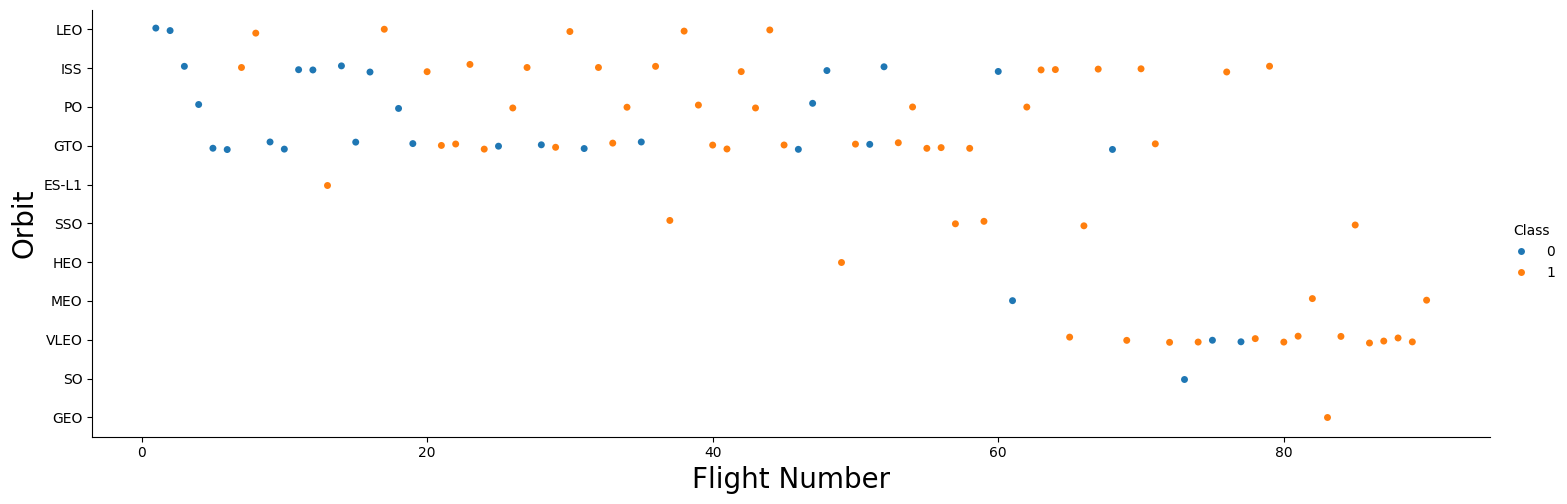

In [15]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=3)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

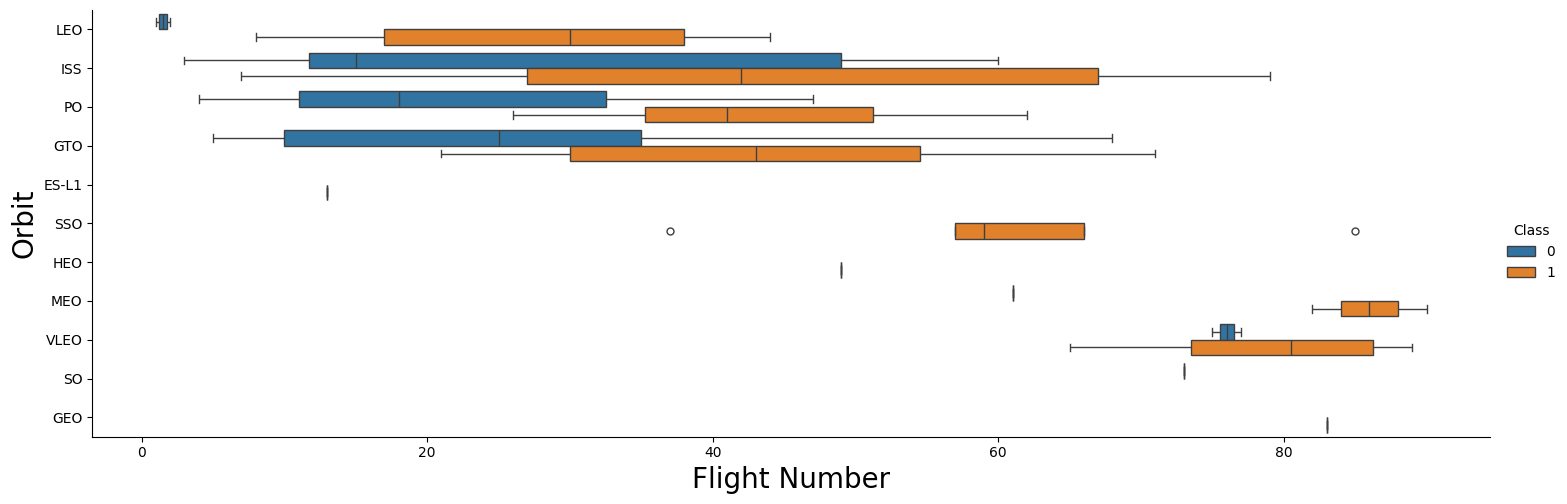

In [16]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=3, kind='box')
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


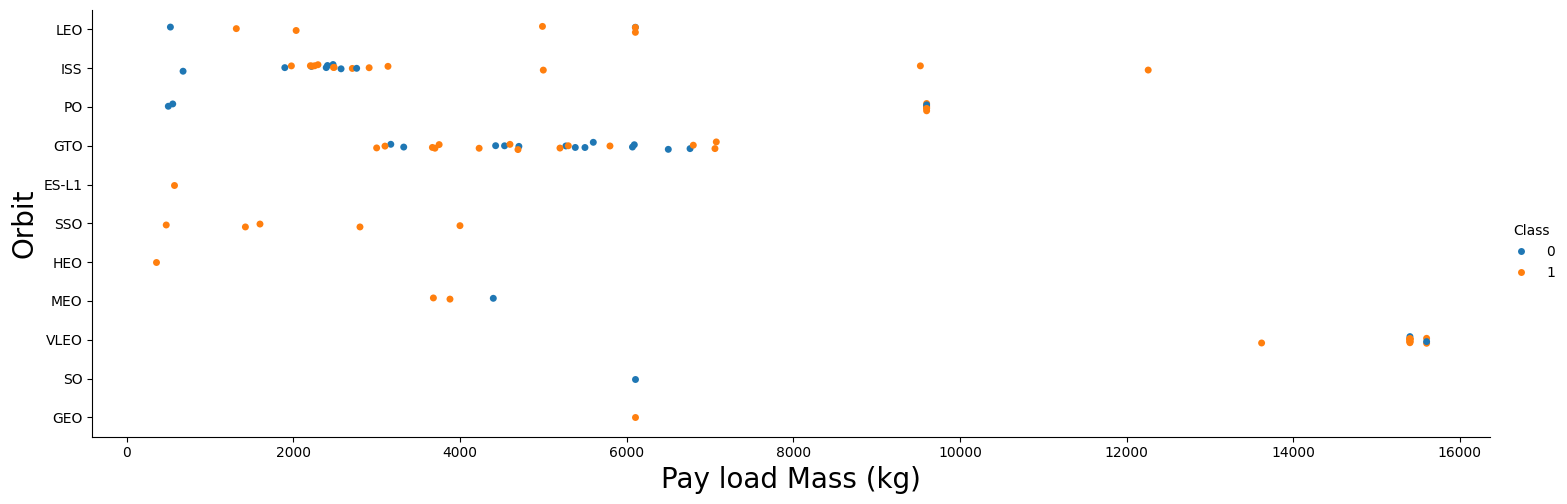

In [17]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=3)
plt.xlabel("Pay load Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

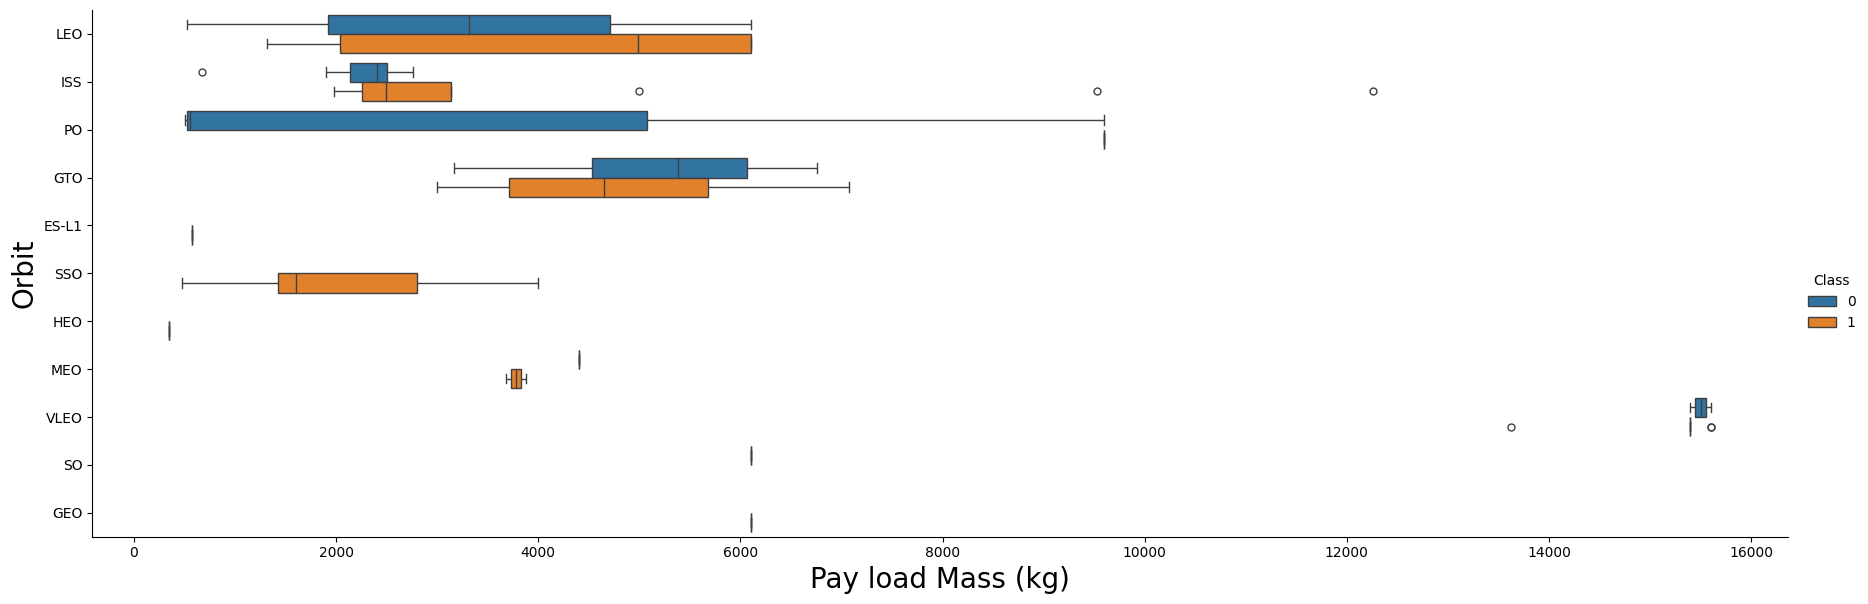

In [18]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=3, kind='box', height=6)
plt.xlabel("Pay load Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


Uncomment function below to help you get the year from the date: (if necessary)

```python
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
```

In [19]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [20]:
df.groupby(['year'])['Class'].mean()

year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

<Axes: xlabel='year'>

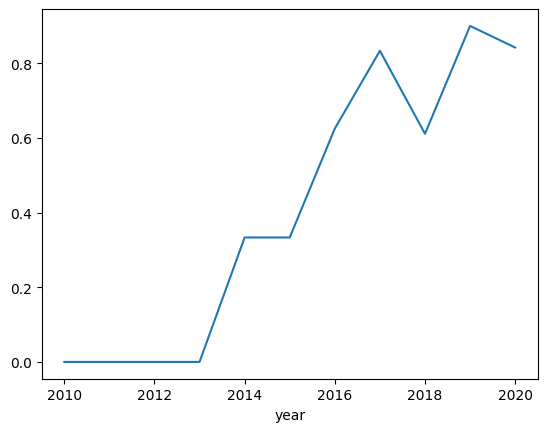

In [21]:
df.groupby(['year'])['Class'].mean().plot(kind='line')

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbit</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [24]:
to_dummy_obj_columns = features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']]

In [25]:
to_dummy_bool_columns = features.select_dtypes(include=['bool']).astype('str')

#### Get dummy object columns

In [26]:
pd.get_dummies(to_dummy_obj_columns)

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [27]:
features_one_hot = pd.concat([features, pd.get_dummies(to_dummy_obj_columns)], axis =1)
features_one_hot.drop(to_dummy_obj_columns.columns,axis = 1, inplace = True)

In [28]:
features_one_hot.shape

(90, 80)

#### Get dummy bool volumns

In [29]:
pd.get_dummies(to_dummy_bool_columns)

,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,True,False,True,False,True,False
1,True,False,True,False,True,False
2,True,False,True,False,True,False
3,True,False,True,False,True,False
4,True,False,True,False,True,False
...,...,...,...,...,...,...
85,False,True,False,True,False,True
86,False,True,False,True,False,True
87,False,True,False,True,False,True
88,False,True,False,True,False,True


In [30]:
features_one_hot = pd.concat([features_one_hot, pd.get_dummies(to_dummy_bool_columns)], axis =1)
features_one_hot.drop(to_dummy_bool_columns.columns,axis = 1, inplace = True)

In [31]:
features_one_hot.shape

(90, 83)

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [32]:
# HINT: use astype function
features_one_hot = features_one_hot.astype('float')

In [33]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   Block                                90 non-null     float64
 4   ReusedCount                          90 non-null     float64
 5   Orbit_ES-L1                          90 non-null     float64
 6   Orbit_GEO                            90 non-null     float64
 7   Orbit_GTO                            90 non-null     float64
 8   Orbit_HEO                            90 non-null     float64
 9   Orbit_ISS                            90 non-null     float64
 10  Orbit_LEO                            90 non-null     float64
 11  Orbit_MEO                         